We Build a random forest model to predict the number of total affected records using different features as the company, the source of information, the type of attack, the year and the two formula given in the litterature by Olivier Lopez and Jacob.

Here we upload our data
Source : Privacy Rights ClearingHouse

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PRCBON.csv to PRCBON.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

We upload our library

In [ ]:
import pandas as pd   # for data manipulation
from sklearn.preprocessing import StandardScaler  # for data standardization
from sklearn.cluster import KMeans # for KMeans clustering
from sklearn.decomposition import PCA # for dimension reduction
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # used for plotting
import numpy as np # useful for working with arrays
from sklearn.model_selection import train_test_split # for data splitting

In [ ]:
data1 = "us_companies_all.csv"
df = pd.read_csv(data1, sep= ",")
data = "PRCBON.csv"
df2 = pd.read_csv(data, sep = ";")

NameError: ignored

In [ ]:
df2['employees']=df['full_time_employees']
for j in range(458):
  for i in range(695):
    if df['company_name'][i] == df2['Company'][j+6255]:
       df2['employee'][j+6255] = df['full_time_employees'][i]


KeyError: ignored

In [ ]:
df2.to_csv('df2.csv', index = "false")

NameError: ignored

KeyboardInterrupt: ignored

In [ ]:
df.head()

,company_name_id,company_name,url,contact_first_name,contact_last_name,contact_title,contact_email,contact_phone,city,state,country,zip_code,year_founded,full_time_employees,company_type,company_category,revenue_source,business_model,social_impact,description,description_short,financial_info,source_count,data_types,data_comments,example_uses,data_impacts,date_created,last_updated,display,survey_submitted,vetted,vettedByCompany,submitted_through_website,locked,notes
0,1,1,dfd.com,sdf,fd,sd,as@df.com,NaN,NaN,AK,us,10023.0,1092.0,201-500,Private,Data/Technology,Government contract,Business to Consumer,Public safety,s,s,s,NaN,NaN,NaN,NaN,[],2015-10-20 17:05:06.926540,2015-10-20 17:05:07.282560,False,True,False,True,True,False,NaN
1,1099is,1099.is,http://1099.is,na,na,NaN,hello@1099.is,NaN,New York,NY,us,NaN,1980.0,NaN,Public,Finance & Investment,"Data analysis for clients, Database licensing",NaN,NaN,Working for yourself has different tax implica...,1099.is helps people navigate the confusing ta...,NaN,1-10,NaN,NaN,NaN,[],2013-12-15 15:28:20.677000,2014-09-11 17:21:28.582504,False,True,False,True,False,False,dropped
2,1800recyclingcom,1800Recycling.com,http://1800recycling.com,NaN,NaN,NaN,NaN,NaN,Fresno,CA,us,93711.0,NaN,NaN,Public,Environment & Weather,NaN,NaN,NaN,1-800-RECYCLING.com is a dynamic recycling and...,This company is a search engine for recycling ...,NaN,NaN,NaN,NaN,NaN,[],2013-12-15 15:28:20.700000,2014-03-18 21:04:05.465194,False,False,False,False,False,False,NaN
3,3-round-stones,3 Round Stones,http://3roundstones.com,Bernadette,Hyland,CEO & Founder,bhyland@3roundstones.com,5713313758,Fredericksburg,VA,us,22408.0,2010.0,1-10,Private,Data/Technology,"Data analysis for clients, Government contract...","Business to Business, Business to Government","Citizen engagement and participation, Consumer...",3 Round Stones licenses a scalable Web develop...,"3 Round Stones helps you produce better data, ...","Privately funded and profitable, 3 Round Stone...",101+,"Agriculture & Food, Business, Consumer, Demogr...",Regional Environmental Protection Agencies and...,3 Round Stones operates the Linked Data Manage...,"[u'Cost efficiency', u'New/improved research',...",2016-01-20 11:33:51.444591,2016-01-20 11:40:56.361494,False,True,False,True,True,False,NaN
4,3-round-stones-inc,"3 Round Stones, Inc.",http://3RoundStones.com,Bernadette,Hyland,CEO,info@3RoundStones.com,877 290-2127,Washington,DC,us,20004.0,2010.0,1-10,Private,Data/Technology,"Data analysis for clients, Database licensing,...","Business to Business, Business to Consumer",NaN,3 Round Stones produces a platform for publish...,Our Open Source platform is used by the Fortun...,"3 Round Stones is a profitable, self-funded, w...",NaN,NaN,NaN,NaN,[],2013-12-15 15:27:46.116000,2014-11-12 14:44:25.969871,True,True,True,True,False,True,NaN


In [ ]:
data = "PRCBON.csv"
df = pd.read_csv("PRCBON.csv", sep= ";")

In [ ]:
df =df.drop(['Unnamed: 0'], axis =1)

In [ ]:
df.shape

(6614, 7)

In [ ]:
df.head(5)

,Company,Date.Made.Public,Total.Records,Type.of.breach,Type.of.organization,Gather.Information.Source,year
0,bullitt county public schools,2009-10-21,676,DISC,EDU,Nonprofit organization,2009
1,roane state community college,2009-10-21,14783,PORT,EDU,Nonprofit organization,2009
2,halifax health,2009-10-15,33000,PORT,MED,Nonprofit organization,2009
3,suffolk community college,2009-10-04,300,DISC,EDU,Nonprofit organization,2009
4,penrose hospital,2009-09-28,175,PHYS,MED,Nonprofit organization,2009


In [ ]:
df["Total.Records"]=pd.to_numeric(df["Total.Records"], errors='coerce')

In [ ]:
df.head()

,Company,Date.Made.Public,Total.Records,Type.of.breach,Type.of.organization,Gather.Information.Source,year
0,bullitt county public schools,2009-10-21,676.0,DISC,EDU,Nonprofit organization,2009
1,roane state community college,2009-10-21,14783.0,PORT,EDU,Nonprofit organization,2009
2,halifax health,2009-10-15,33000.0,PORT,MED,Nonprofit organization,2009
3,suffolk community college,2009-10-04,300.0,DISC,EDU,Nonprofit organization,2009
4,penrose hospital,2009-09-28,175.0,PHYS,MED,Nonprofit organization,2009


In [ ]:
df.describe()
df['Company'].count()

6614

In [ ]:
# Number of missing value of each features
print(df.isnull().sum())

Company                        0
Date.Made.Public               0
Total.Records                 35
Type.of.breach               635
Type.of.organization           0
Gather.Information.Source     34
year                           0
dtype: int64


In [ ]:
# To deal with missing value in the features  with numerical  we remplace the missing value by the median
median = df['Total.Records'].median()
df['Total.Records'].fillna(median, inplace=True)


# Concerning the categorical variable we used the mode
mode1 = df['Type.of.breach'].mode()
df['Type.of.breach'].fillna("HACK", inplace=True)
#df.loc[df["Type.of.breach"]=="mode1","Type.of.breach"]='HACK'

mode2 = df['Gather.Information.Source'].mode()
df['Gather.Information.Source'].fillna("Nonprofit organization", inplace=True)

In [ ]:
from math import exp, log
n=df.shape[0]
df["amount1"]=df['Total.Records']
df['amount2']=df['Total.Records']
for i in range(n):
  df["amount1"][i]= exp(7.68 + 0.76 * log(df["Total.Records"][i]) )
  df["amount2"][i]= exp(9.59 + 0.57* log(df["Total.Records"][i]) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df.head()

,Company,Date.Made.Public,Total.Records,Type.of.breach,Type.of.organization,Gather.Information.Source,year,amount1,amount2
0,bullitt county public schools,2009-10-21,676.0,DISC,EDU,Nonprofit organization,2009,3.062958e+05,5.997271e+05
1,roane state community college,2009-10-21,14783.0,PORT,EDU,Nonprofit organization,2009,3.194487e+06,3.480557e+06
2,halifax health,2009-10-15,33000.0,PORT,MED,Nonprofit organization,2009,5.881014e+06,5.500942e+06
3,suffolk community college,2009-10-04,300.0,DISC,EDU,Nonprofit organization,2009,1.651938e+05,3.774359e+05
4,penrose hospital,2009-09-28,175.0,PHYS,MED,Nonprofit organization,2009,1.096707e+05,2.775976e+05


In [ ]:
df["amount1"]=pd.to_numeric(df["amount1"], errors='coerce')
df["amount2"]=pd.to_numeric(df["amount2"], errors='coerce')

In [ ]:
df.head()

,Company,Date.Made.Public,Total.Records,Type.of.breach,Type.of.organization,Gather.Information.Source,year,amount1,amount2
0,bullitt county public schools,2009-10-21,676.0,DISC,EDU,Nonprofit organization,2009,3.062958e+05,5.997271e+05
1,roane state community college,2009-10-21,14783.0,PORT,EDU,Nonprofit organization,2009,3.194487e+06,3.480557e+06
2,halifax health,2009-10-15,33000.0,PORT,MED,Nonprofit organization,2009,5.881014e+06,5.500942e+06
3,suffolk community college,2009-10-04,300.0,DISC,EDU,Nonprofit organization,2009,1.651938e+05,3.774359e+05
4,penrose hospital,2009-09-28,175.0,PHYS,MED,Nonprofit organization,2009,1.096707e+05,2.775976e+05


In [ ]:
byComp = df.groupby('Type.of.organization')
byComp.mean()

,Total.Records,year,amount1,amount2
Type.of.organization,,,,
BSF,9.606574e+05,2010.703163,3.509752e+07,1.154833e+07
BSO,1.216637e+07,2011.598131,1.937125e+08,3.374471e+07
BSR,1.411985e+06,2011.568562,4.538481e+07,1.309463e+07
EDU,9.616949e+04,2009.635036,5.885195e+06,3.528773e+06
GOV,2.695470e+05,2009.697509,1.501406e+07,6.922255e+06
MED,6.035367e+04,2013.675576,4.384617e+06,2.948655e+06
NGO,1.125937e+05,2010.560000,8.323749e+06,4.616648e+06
Unknown,2.242006e+04,2017.994667,2.221187e+06,1.644952e+06


In [ ]:
byComp.describe()

Total.Records                ...       amount2              
                             count          mean  ...           75%           max
Type.of.organization                              ...                            
BSF                          411.0  9.606574e+05  ...  4.695750e+06  6.572279e+08
BSO                          428.0  1.216637e+07  ...  7.127676e+06  3.688444e+09
BSR                          299.0  1.411985e+06  ...  3.493893e+06  5.704686e+08
EDU                          685.0  9.616949e+04  ...  3.374248e+06  3.148171e+08
GOV                          562.0  2.695470e+05  ...  4.251568e+06  2.579444e+08
MED                         3779.0  6.035367e+04  ...  2.452705e+06  4.633445e+08
NGO                           75.0  1.125937e+05  ...  3.374248e+06  7.852408e+07
Unknown                      375.0  2.242006e+04  ...  9.618015e+05  7.234050e+07

[8 rows x 32 columns]

In [ ]:
byComp1 = df.groupby(['Gather.Information.Source', 'year'])
byComp1.describe()

Total.Records  ...       amount2
                                       count  ...           max
Gather.Information.Source year                ...              
Media                     2005           3.0  ...  3.831914e+06
                          2006          15.0  ...  3.385676e+07
                          2007          17.0  ...  1.302126e+08
                          2008          27.0  ...  4.673534e+08
                          2009          21.0  ...  2.681479e+07
                          2010          14.0  ...  5.307428e+08
                          2011          12.0  ...  5.355666e+08
                          2012          30.0  ...  1.117493e+08
                          2013         170.0  ...  3.575172e+08
                          2014          92.0  ...  1.971896e+09
                          2015          47.0  ...  4.673534e+08
                          2016          74.0  ...  3.688444e+09
                          2017          73.0  ...  6.572279e+08
                          2018          46.0  ...  5.704686e+08
Nonprofit organization    2005         108.0  ...  3.148171e+08
                          2006         361.0  ...  2.489627e+08
                          2007         323.0  ...  5.307428e+08
                          2008         243.0  ...  8.712367e+07
                          2009         155.0  ...  9.622701e+07
                          2010         365.0  ...  9.512526e+07
                          2011         378.0  ...  8.759567e+07
                          2012         382.0  ...  1.165709e+08
                          2013         143.0  ...  1.489728e+07
                          2014          21.0  ...  3.546830e+07
                          2015          12.0  ...  4.059550e+07
                          2016           7.0  ...  2.379776e+07
                          2017           3.0  ...  5.595348e+06
                          2018           5.0  ...  5.050065e+05
US GA: Federal - HIPAA    2009          17.0  ...  9.305905e+06
                          2010         194.0  ...  4.306349e+07
                          2011         195.0  ...  9.512526e+07
                          2012         200.0  ...  3.337167e+07
                          2013         260.0  ...  8.509011e+07
                          2014         294.0  ...  9.061815e+07
                          2015         262.0  ...  4.633445e+08
                          2016         322.0  ...  8.004754e+07
                          2017         320.0  ...  3.131921e+07
                          2018         291.0  ...  4.362927e+07
US GA: State              2005           6.0  ...  5.707832e+07
                          2006           9.0  ...  6.628555e+07
                          2010           6.0  ...  1.604578e+06
                          2012          17.0  ...  3.844891e+07
                          2013          16.0  ...  3.481154e+07
                          2014         199.0  ...  3.324280e+07
                          2015          56.0  ...  9.176056e+07
                          2016         205.0  ...  6.026498e+07
                          2017          29.0  ...  1.067653e+08
                          2018         569.0  ...  3.148171e+08

[48 rows x 24 columns]

In [ ]:
byComp2 = df.groupby('Type.of.breach')
byComp2.describe()

Total.Records                ...       amount2              
                       count          mean  ...           75%           max
Type.of.breach                              ...                            
CARD                    32.0  2.875949e+05  ...  1.035907e+06  1.165709e+08
DISC                  1458.0  2.933870e+05  ...  2.258014e+06  5.704686e+08
HACK                  2230.0  2.608258e+06  ...  3.781742e+06  3.688444e+09
INSD                   377.0  1.766113e+05  ...  1.954617e+06  2.579444e+08
PHYS                  1459.0  2.786839e+04  ...  1.949734e+06  9.512526e+07
PORT                   874.0  1.254610e+05  ...  3.942988e+06  2.489627e+08
STAT                   184.0  8.823876e+04  ...  3.679847e+06  8.759567e+07

[7 rows x 32 columns]

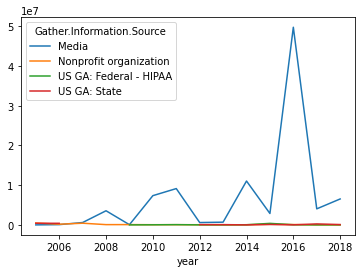

In [ ]:
source = ['Nonprofit organization', 'Media', 'US GA: Federal - HIPAA', 'US GA: State']
df_me = df.loc[df['Gather.Information.Source'].isin(source)]
df_me.groupby(['year', 'Gather.Information.Source'])['Total.Records'].mean().unstack().plot()

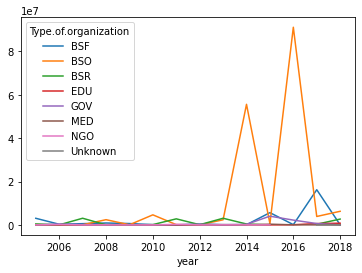

In [ ]:
source = ['BSF', 'BSO', 'BSR', 'EDU', 'GOV', 'MED','NGO', 'Unknown']
df_me1 = df.loc[df['Type.of.organization'].isin(source)]
df_me1.groupby(['year', 'Type.of.organization'])['Total.Records'].mean().unstack().plot()

TypeError: ignored

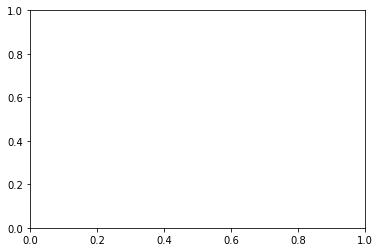

In [ ]:
plt.axis
source = ['CARD', 'DISC', 'HACK', 'INSD', 'PHYS', 'PORT','STAT']
df_me1 = df.loc[df['Type.of.breach'].isin(source)]
plt.yscale("log", basex = 10, subsx = [2,3,4,5])
np.array(df_me1.groupby(['year', 'Type.of.breach'])['Total.Records'].mean().unstack().plot())

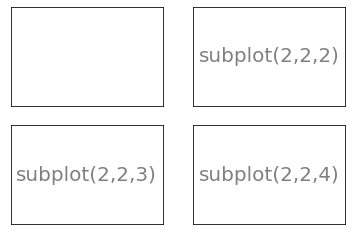

In [ ]:
from pylab import *

subplot(2,2,1)
xticks([]), yticks([])
df_me1.groupby(['year', 'Type.of.breach'])['Total.Records'].mean().unstack()

subplot(2,2,2)
xticks([]), yticks([])
text(0.5,0.5, 'subplot(2,2,2)',ha='center',va='center',size=20,alpha=.5)

subplot(2,2,3)
xticks([]), yticks([])
text(0.5,0.5, 'subplot(2,2,3)',ha='center',va='center',size=20,alpha=.5)

subplot(2,2,4)
xticks([]), yticks([])
text(0.5,0.5, 'subplot(2,2,4)',ha='center',va='center',size=20,alpha=.5)

# savefig('../figures/subplot-grid.png', dpi=64)
show()

In [ ]:
plt.hist([df1['Total.Records'],df2['Total.Records'],df3['Total.Records'],df4['Total.Records'],df5['Total.Records']], bins = [500,1000,1500,2000, 2500, 3000],
         color = ['green', 'yellow', 'black','blue','red'], label=["Non prpfit", "Media", "US GA: Federal - HIPAA", "US GA: State" ])
plt.xlabel("Total Records")
plt.ylabel("Total number Company")
plt.title("Total records analysis")
plt.legend()

In [ ]:
dfo = df['Company'].unique()

In [ ]:
dfo.shape

(5474,)

In [ ]:
df1=df[df['Gather.Information.Source']=='Nonprofit organization']

In [ ]:
df2=df[df['Gather.Information.Source']=='Media']

In [ ]:
df3=df[df['Gather.Information.Source']=='US GA: Federal - HIPAA']

In [ ]:
df4=df[df['Gather.Information.Source']=='US GA: State']

In [ ]:
df5=df[df['Gather.Information.Source']=='nan']

,Unnamed: 0,Company,Date.Made.Public,Total.Records,Type.of.breach,Type.of.organization,Gather.Information.Source,year


In [ ]:
df1.head()

,Unnamed: 0,Company,Date.Made.Public,Total.Records,Type.of.breach,Type.of.organization,Gather.Information.Source,year
0,1,bullitt county public schools,2009-10-21,676.0,DISC,EDU,Nonprofit organization,2009
1,2,roane state community college,2009-10-21,14783.0,PORT,EDU,Nonprofit organization,2009
2,3,halifax health,2009-10-15,33000.0,PORT,MED,Nonprofit organization,2009
3,4,suffolk community college,2009-10-04,300.0,DISC,EDU,Nonprofit organization,2009
4,5,penrose hospital,2009-09-28,175.0,PHYS,MED,Nonprofit organization,2009


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


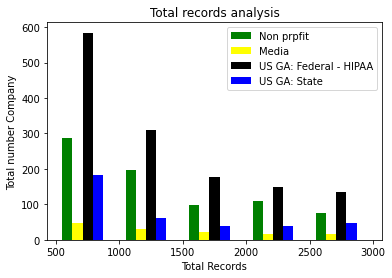

In [ ]:
plt.hist([df1['Total.Records'],df2['Total.Records'],df3['Total.Records'],df4['Total.Records'],df5['Total.Records']], bins = [500,1000,1500,2000, 2500, 3000],
         color = ['green', 'yellow', 'black','blue','red'], label=["Non prpfit", "Media", "US GA: Federal - HIPAA", "US GA: State" ])
plt.xlabel("Total Records")
plt.ylabel("Total number Company")
plt.title("Total records analysis")
plt.legend()

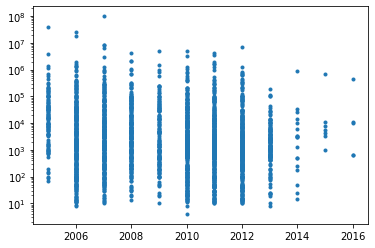

In [ ]:
plt.plot(df1['year'], df1['Total.Records'], marker=".", linestyle="")
plt.yscale("log")

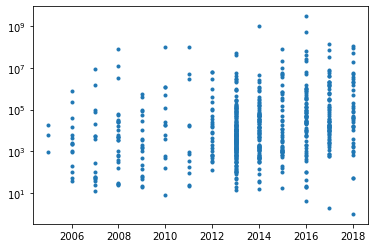

In [ ]:
plt.plot(df2['year'], df2['Total.Records'], marker=".", linestyle="")
plt.yscale("log")

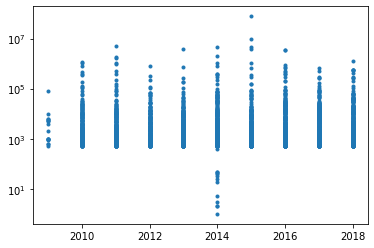

In [ ]:
plt.plot(df3['year'], df3['Total.Records'], marker=".", linestyle="")
plt.yscale("log")

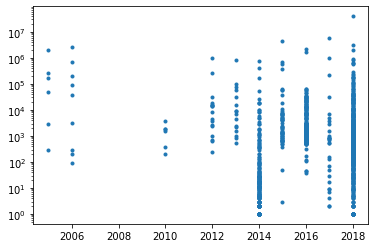

In [ ]:
plt.plot(df4['year'], df4['Total.Records'], marker=".", linestyle="")
plt.yscale("log")

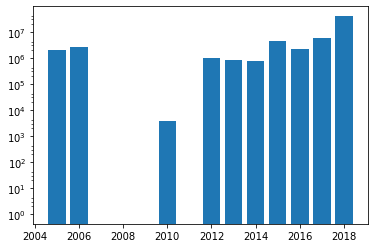

In [ ]:
plt.bar(df4['year'], df4['Total.Records'])
plt.yscale("log", basey=10, subsy=[2,3,4])

In [ ]:
# Nombre total de valeurs manquantes pour chaque caractéristique
print(df.isnull().sum())

Unnamed: 0                     0
Company                        0
Date.Made.Public               0
Total.Records                 35
Type.of.breach               635
Type.of.organization           0
Gather.Information.Source     34
year                           0
dtype: int64


In [ ]:
df.head(5)

,Unnamed: 0,Company,Date.Made.Public,Total.Records,Type.of.breach,Type.of.organization,Gather.Information.Source,year
0,1,bullitt county public schools,2009-10-21,676.0,DISC,EDU,Nonprofit organization,2009
1,2,roane state community college,2009-10-21,14783.0,PORT,EDU,Nonprofit organization,2009
2,3,halifax health,2009-10-15,33000.0,PORT,MED,Nonprofit organization,2009
3,4,suffolk community college,2009-10-04,300.0,DISC,EDU,Nonprofit organization,2009
4,5,penrose hospital,2009-09-28,175.0,PHYS,MED,Nonprofit organization,2009


In [ ]:
# Nombre total de valeurs manquantes pour chaque caractéristique
print(df.isnull().sum())

Company                      0
Date.Made.Public             0
Total.Records                0
Type.of.breach               0
Type.of.organization         0
Gather.Information.Source    0
year                         0
dtype: int64


In [ ]:
categ = ["Type.of.organization", "Type.of.breach", "Gather.Information.Source"]
 # One Hot Encoding conversion
df1 = pd.get_dummies(df, columns=categ)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df3 = df1.drop(["Company", "Date.Made.Public"], axis=1)

In [ ]:
df1

,Company,Date.Made.Public,Total.Records,year,amount1,amount2,Type.of.organization_BSF,Type.of.organization_BSO,Type.of.organization_BSR,Type.of.organization_EDU,Type.of.organization_GOV,Type.of.organization_MED,Type.of.organization_NGO,Type.of.organization_Unknown,Type.of.breach_CARD,Type.of.breach_DISC,Type.of.breach_HACK,Type.of.breach_INSD,Type.of.breach_PHYS,Type.of.breach_PORT,Type.of.breach_STAT,Gather.Information.Source_Media,Gather.Information.Source_Nonprofit organization,Gather.Information.Source_US GA: Federal - HIPAA,Gather.Information.Source_US GA: State
0,bullitt county public schools,2009-10-21,676.0,2009,3.062958e+05,5.997271e+05,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,roane state community college,2009-10-21,14783.0,2009,3.194487e+06,3.480557e+06,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,halifax health,2009-10-15,33000.0,2009,5.881014e+06,5.500942e+06,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,suffolk community college,2009-10-04,300.0,2009,1.651938e+05,3.774359e+05,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,penrose hospital,2009-09-28,175.0,2009,1.096707e+05,2.775976e+05,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6609,healthfitness,2018-10-28,614.0,2018,2.847014e+05,5.677277e+05,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
6610,raley s bel air mart nob hill general store inc,2018-10-26,10124.0,2018,2.395793e+06,2.805012e+06,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
6611,cno financial group inc,2018-10-25,566217.0,2018,5.100921e+07,2.780253e+07,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
6612,cj elmwood partners l p,2018-10-22,22416.0,2018,4.383346e+06,4.412678e+06,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
X_data = df1.drop(['Company','Date.Made.Public','Total.Records'], axis=1)
y_data = df1['Total.Records']

In [ ]:
meantotal=y_data.mean()
stdtotal = y_data.std()

In [ ]:
import seaborn as sn
X_data1 = df1.drop(['Company','Date.Made.Public'], axis=1)
covmatrix = np.cov(X_data1)
sn.heatmap(covmatrix, annot= True, fmt = 'g')
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6614 entries, 0 to 6613
Data columns (total 24 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Unnamed: 0                                        6614 non-null   int64  
 1   Company                                           6614 non-null   object 
 2   Date.Made.Public                                  6614 non-null   object 
 3   Total.Records                                     6614 non-null   float64
 4   year                                              6614 non-null   int64  
 5   Type.of.organization_BSF                          6614 non-null   uint8  
 6   Type.of.organization_BSO                          6614 non-null   uint8  
 7   Type.of.organization_BSR                          6614 non-null   uint8  
 8   Type.of.organization_EDU                          6614 non-null   uint8  
 9   Type.of.organizatio

In [ ]:
y_data1 = (y_data-meantotal)/stdtotal

In [ ]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_val, y_Train, y_val = train_test_split(X_data, y_data,test_size = 0.3, random_state=42)

In [ ]:
y_Train1 = (y_Train-meantotal)/stdtotal

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_Train,y_Train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf_y_pred = rf_model.predict(X_val)

In [ ]:
rf_y_pred

array([-0.0215105 , -0.02466063, -0.02466063, ..., -0.02466063,
       -0.02466063, -0.02464393])

In [ ]:
rf_y_pred1=rf_y_pred*stdtotal + meantotal

In [ ]:
rf_y_pred1

array([  96908.69362689,    6880.71571353,   96908.69362689, ...,
       1967333.4970041 ,   17552.55575266,    5725.46666552])

In [ ]:
y_val

3649    132940.0
2299      1871.0
3768      1089.0
4914      4386.0
5626      1900.0
          ...   
4315      9861.0
4015     16988.0
6156      6094.0
1876      1300.0
2619     28187.0
Name: Total.Records, Length: 1985, dtype: float64

In [ ]:
errors = abs(rf_y_pred - y_val)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 483296.66 degrees.


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_Train,label=y_Train1)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_Train,y_Train1)

preds = xg_reg.predict(X_val)

[19:29:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
preds1=preds*stdtotal + meantotal

In [ ]:
preds1

array([7198045. , 7709386.5, 7198045. , ..., 7700586. , 7198045. ,
       7198045. ], dtype=float32)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_val, preds1))
print("RMSE: %f" % (rmse))

RMSE: 13528133.781707


In [ ]:
data_dmatrix = xgb.DMatrix(data=X_Train,label=y_Train1)

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[19:44:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:44:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:44:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.163427,0.486227,1.011558,0.752926
1,1.138840,0.500834,0.981252,0.768449
2,1.117757,0.514576,0.954819,0.782432
3,1.098863,0.526828,0.930262,0.796068
4,1.082705,0.538284,0.909451,0.807822


In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

18    0.800534
Name: test-rmse-mean, dtype: float64


In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[19:55:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


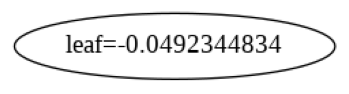

In [ ]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

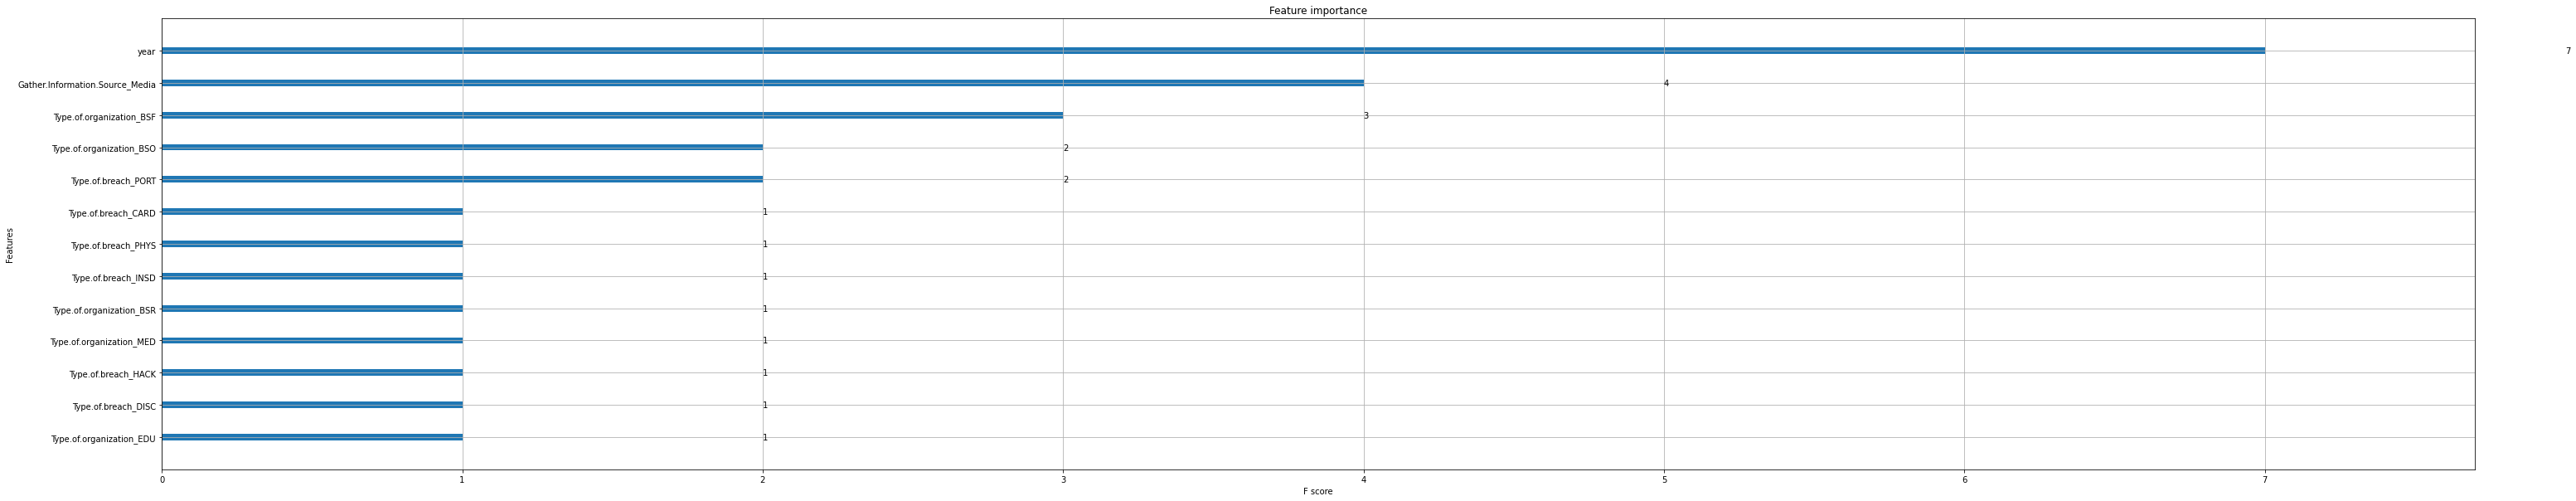

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
from matplotlib.lines import Line2D
from scipy.stats import pearsonr

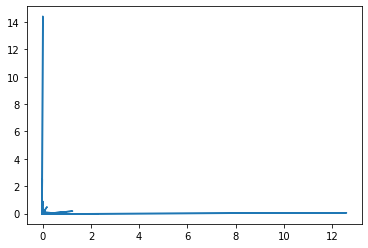

In [ ]:
# find the correlation between real answer and prediction
correlation = round(pearsonr(rf_y_pred, y_val)[0], 5)

output_filename = "rf_regression.png"
title_name = "Random Forest Regression - Total Records vs Predicted Total Records- correlation ({})".format(correlation)
x_axis_label = "Total Records"
y_axis_label = "Predicted Total Records"

# plot data
plt.plot(y_val, rf_y_pred)

In [ ]:
# define the model
def baseline():
    # create model
    model = Sequential()
    # add one fully connected layer
    model.add(Dense(13, input_dim=13, activation='relu'))
    # add a fully connected layer for the output
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=[metrics.mse])

    return model

In [ ]:
estimator = KerasRegressor(build_fn=baseline, epochs=20, batch_size=5, verbose=1)

In [ ]:
baseline().summary()

In [ ]:
history = estimator.fit(X_train, Y_train)

In [ ]:
prediction = estimator.predict(X_test)

In [ ]:
mean_squared_error(Y_test, prediction)